In [56]:
# %pip install keras
# %pip install tensorflow
# %pip install image_dataset_loader

import keras
import os
from keras.models import *
from keras.layers import *
from keras.datasets import cifar10
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.utils import *
from keras.applications.vgg16 import VGG16
from image_dataset_loader import load


# train_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/train/")
# validation_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/val/")
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/test/")


train_data_dir = os.path.dirname("output_path/train/")
validation_data_dir = os.path.dirname("output_path/val/")
test_data_dir = os.path.dirname("output_path/test/")

In [57]:

img_width, img_height = 224, 224
batch_size = 16

datagenerate_train = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)
                                
train_generator = datagenerate_train.flow_from_directory(train_data_dir,
                                                target_size=(img_width,img_height),
                                                 batch_size=batch_size,
                                                 #subset="training",
                                                 class_mode='categorical')

datagenerate_validation = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

validation_generator = datagenerate_validation.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width,img_height),
                                                        batch_size=batch_size,
                                                        #subset="validation",
                                                        class_mode='categorical')


print(train_generator)
print(validation_generator)
# print(test_generator)

Found 816 images belonging to 7 classes.
Found 101 images belonging to 7 classes.


# The Model

In [58]:
def define_VGGmodel():

    model = VGG16(include_top=False, input_shape=(img_width, img_height, 3))

    for layer in model.layers:
        layer.trainable = False

    flat1 = Flatten()(model.layers[-1].output)

    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)

    output = Dense(7, activation='softmax')(class1)

    model = Model(inputs=model.inputs, outputs=output)

    #opt = SGD(lr=0.001, momentum=0.9)

    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    return model

model = define_VGGmodel()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [59]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [60]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator), validation_data=validation_generator,
 validation_steps=len(validation_generator), epochs=20, verbose=1, shuffle=False, callbacks=[earlystopping])

Epoch 1/20
51/51 [==============================] - 84s 2s/step - loss: 2.3409 - categorical_accuracy: 0.3370 - val_loss: 1.4180 - val_categorical_accuracy: 0.4950
Epoch 2/20
51/51 [==============================] - 82s 2s/step - loss: 1.0828 - categorical_accuracy: 0.6373 - val_loss: 0.9416 - val_categorical_accuracy: 0.6832
Epoch 3/20
51/51 [==============================] - 79s 2s/step - loss: 0.6813 - categorical_accuracy: 0.8407 - val_loss: 0.7241 - val_categorical_accuracy: 0.7723
Epoch 4/20
51/51 [==============================] - 81s 2s/step - loss: 0.4593 - categorical_accuracy: 0.9093 - val_loss: 0.5911 - val_categorical_accuracy: 0.8713
Epoch 5/20
51/51 [==============================] - 81s 2s/step - loss: 0.2993 - categorical_accuracy: 0.9498 - val_loss: 0.5774 - val_categorical_accuracy: 0.7822
Epoch 6/20
51/51 [==============================] - 81s 2s/step - loss: 0.1966 - categorical_accuracy: 0.9816 - val_loss: 0.4637 - val_categorical_accuracy: 0.8812
Epoch 7/20
51/51

In [61]:
print(history.history)

{'loss': [2.340888023376465, 1.0827934741973877, 0.6813398003578186, 0.4593102037906647, 0.2992537021636963, 0.19658273458480835, 0.13636904954910278, 0.10546981543302536, 0.08456824719905853, 0.06033995747566223, 0.046022165566682816, 0.037503521889448166, 0.03129025921225548, 0.02388720214366913, 0.02128247730433941, 0.018455274403095245, 0.01570982299745083, 0.0138375423848629, 0.011903111822903156, 0.010754878632724285], 'categorical_accuracy': [0.33700981736183167, 0.6372548937797546, 0.8406862616539001, 0.9093137383460999, 0.9497548937797546, 0.9816176295280457, 0.9950980544090271, 0.9926470518112183, 0.998774528503418, 0.998774528503418, 0.998774528503418, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [1.4179595708847046, 0.941559910774231, 0.7240608334541321, 0.5911123156547546, 0.577414870262146, 0.46369168162345886, 0.354611873626709, 0.4009590148925781, 0.3295239806175232, 0.3274032175540924, 0.33097076416015625, 0.3108346462249756, 0.30164963006973267, 0.2961660

# Diagnostic plot

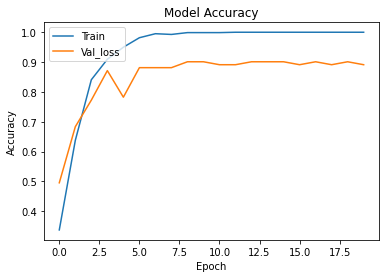

In [62]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val_loss'], loc='upper left')
plt.show()

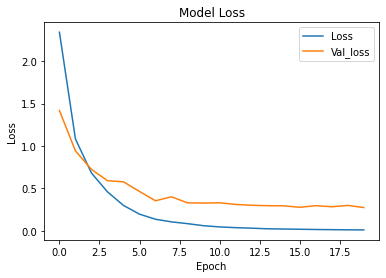

In [63]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_loss'], loc='upper right')
plt.show()

In [64]:
print('Validation image - evaluation')
_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('accuracy score: ', acc*100 )

Validation image - evaluation
7/7 [==============================] - 9s 1s/step - loss: 0.2747 - categorical_accuracy: 0.8911
accuracy score:  89.10890817642212


In [65]:
# print('Test image - evaluation')
# _, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
# print('accuracy score: ', acc*100 )

In [66]:
model.save('model/VGG16_adam_train-89.11%_val-89.10_test-91.26v2%')

#model=load_model('vgg15-softmax-classifier_train-91.54_val-72.06_test-83.82%')

INFO:tensorflow:Assets written to: model/VGG16_adam_train-89.11%_val-89.10_test-91.26v2%\assets


INFO:tensorflow:Assets written to: model/VGG16_adam_train-89.11%_val-89.10_test-91.26v2%\assets


# Testing

In [67]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v1/train-test/")

datagenerate_test = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

test_generator = datagenerate_test.flow_from_directory(test_data_dir,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size,
                                                #subset="validation",
                                                class_mode='categorical')

Found 103 images belonging to 7 classes.


In [68]:
print('Test image - evaluation')
_, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('accuracy score: ', acc*100 )

Test image - evaluation
7/7 [==============================] - 11s 1s/step - loss: 0.1794 - categorical_accuracy: 0.9515
accuracy score:  95.14563083648682


In [69]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('accuracy: ', metrics.accuracy_score(y_pred,test_generator.classes))

7/7 [==============================] - 10s 1s/step
accuracy:  0.1650485436893204


In [70]:
print('Confusion Matrix')
print(confusion_matrix(y_pred, test_generator.classes))

Confusion Matrix
[[1 2 1 3 2 0 5]
 [3 4 3 0 6 2 1]
 [0 6 0 2 1 1 2]
 [3 2 1 0 0 1 2]
 [3 1 3 3 3 2 2]
 [1 2 3 1 3 8 1]
 [3 1 1 0 3 4 1]]


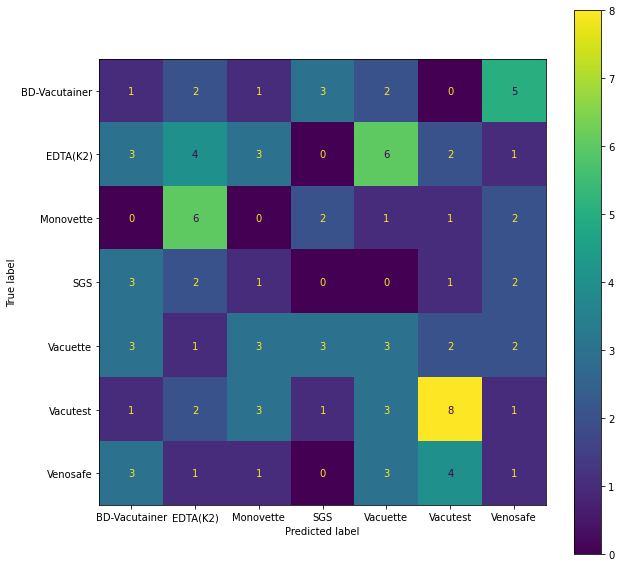

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, test_generator.classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'BD-Vacutainer', 'EDTA(K2)', 'Monovette','SGS', 'Vacuette' , 'Vacutest', 'Venosafe'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmd.plot(ax=ax)

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy Score :', accuracy_score(y_pred, test_generator.classes)) 
print ('Report : ')
target_names = ['BD-Vacutainer', 'EDTA(K2)', 'Monovette', 'SGS', 'Vacuette' , 'Vacutest', 'Venosafe']
print (classification_report(y_pred, test_generator.classes, target_names=target_names)) 

Accuracy Score : 0.1650485436893204
Report : 
               precision    recall  f1-score   support

BD-Vacutainer       0.07      0.07      0.07        14
     EDTA(K2)       0.22      0.21      0.22        19
    Monovette       0.00      0.00      0.00        12
          SGS       0.00      0.00      0.00         9
     Vacuette       0.17      0.18      0.17        17
     Vacutest       0.44      0.42      0.43        19
     Venosafe       0.07      0.08      0.07        13

     accuracy                           0.17       103
    macro avg       0.14      0.14      0.14       103
 weighted avg       0.17      0.17      0.17       103



The Accuracy score is 15.53%, this could be due to the image. One of the plausible issues i can think of that cause such a low accuracy is the fact that maybe tht augmented image has not been since by the model.


#### Test an image


In [73]:
# model = load_model("classifier_train-99.3_val-91.6_test-88.99%")



In [74]:

# Y_pred = model.predict(test_generator)
# y_pred = np.argmax(Y_pred, axis=1)
# print('accuracy: ', metrics.accuracy_score(y_pred,test_generator.classes))

In [75]:
# print('Confusion Matrix')
# print(confusion_matrix(y_pred, test_generator.classes))

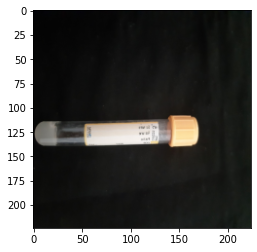

In [85]:
from skimage.transform import resize
img_width, img_height = 224, 224

# Image = plt.imread("output_path/test/BD-Vacutainer/BD-Vacutainer1_small_constrast.jpg")
# Image = plt.imread("output_path/test/EDTA(K2)/EDTA(K2)1_small_flip_vr.jpg")
Image = plt.imread("output_path/test/SGS/SGS1c_small_flip_hr.jpg")


RImage = resize(Image, (img_width, img_height, 3))
img = plt.imshow(RImage)

In [86]:
import numpy as np

predictions = model.predict(np.array( [RImage] ))
predictions

y_pred = np.argmax(predictions, axis=1)

print(y_pred)




1/1 [==============================] - 0s 143ms/step
[0]
